In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from project_functions import regression_metrics, scale_features

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import (log_loss,
                            roc_auc_score, 
                            recall_score, 
                            precision_score, 
                            average_precision_score, 
                            f1_score, classification_report, 
                            accuracy_score, plot_roc_curve, 
                            plot_precision_recall_curve, 
                            plot_confusion_matrix
                        )

In [3]:
freq_flights = pd.read_csv("Features_with_frequencies.csv")

In [4]:
freq_flights.head()

,Unnamed: 0,fl_date,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,...,destination_id_frequency,origin_id_frequency,mkt_frequency,branded_frequency,op_frequency,flight_num_frequency,Cloudy,Rainy,Snowy,Sunny
0,0,2018-12-01,1229,1337.0,68.0,12.0,1349.0,1452.0,9.0,1355,...,0.037064,0.003389,0.269857,0.147168,0.030035,0.000132,0,1,0,0
1,1,2018-12-01,1945,1941.0,-4.0,15.0,1956.0,2209.0,6.0,2244,...,0.022009,0.019777,0.025626,0.025626,0.025626,0.000269,1,0,0,0
2,2,2018-12-01,1110,1107.0,-3.0,32.0,1139.0,1844.0,12.0,1855,...,0.019954,0.022224,0.025626,0.025626,0.025626,0.000380,0,0,0,1
3,3,2018-12-01,1739,1736.0,-3.0,11.0,1747.0,1911.0,4.0,1930,...,0.014786,0.048256,0.025626,0.025626,0.025626,0.000345,0,1,0,0
4,4,2018-12-01,930,926.0,-4.0,12.0,938.0,1607.0,7.0,1649,...,0.048839,0.030977,0.025626,0.025626,0.025626,0.000345,0,1,0,0


In [5]:
freq_flights.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# not using fl_date
freq_flights.drop(['dep_delay', 'fl_date'], axis=1, inplace=True)

In [7]:
categoric = ['diverted', 'Cloudy', 'Rainy', 'Snowy', 'Sunny']
numeric = list(set(freq_flights.columns) - set(categoric))

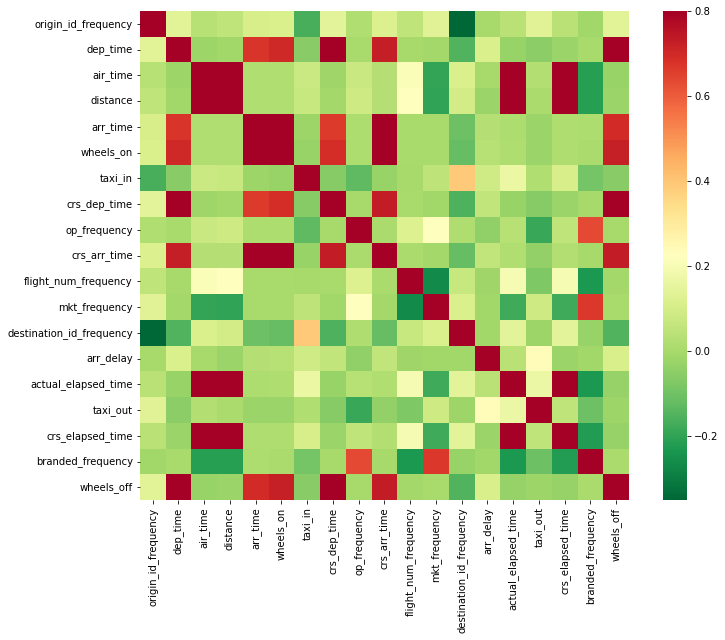

In [8]:
# check most correlated numeric variables with arr_delay
corrmat = freq_flights[numeric].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

plt.show()

In [9]:
numeric.remove('arr_delay')

# Modeling

In [10]:
# separate target and predictors
y = freq_flights['arr_delay']
X = freq_flights.drop('arr_delay', axis=1)

In [11]:
seed = 100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [12]:
scaler = StandardScaler()

X_train_scaled, X_test_scaled = scale_features(X_train, X_test, numeric, categoric, scaler)

#### Linear Regression

In [13]:
line_reg = LinearRegression()

line_reg.fit(X_train_scaled, y_train)

yhat_line = line_reg.predict(X_test_scaled)

In [14]:
regression_metrics(y_test, yhat_line)

R^2: 0.18449823485414485
Mean Squared Error: 1636.2911210033394
Mean Absolute Error: 17.90655425889031
Root MSE: 40.45109542402207


#### Random Forest

In [15]:
rfc = RandomForestRegressor(n_estimators=10, max_depth=8, random_state=seed)

rfc.fit(X_train_scaled, y_train)

yhat_rfc = rfc.predict(X_test_scaled)

In [16]:
regression_metrics(y_test, yhat_rfc)

R^2: 0.6450420172076232
Mean Squared Error: 712.2174597237587
Mean Absolute Error: 16.06156833723872
Root MSE: 26.687402641016952


#### Naive Bayes

In [17]:
gauss = GaussianNB()

gauss.fit(X_train_scaled, y_train) 

yhat_nb = gauss.predict(X_test_scaled)

In [20]:
regression_metrics(y_test, yhat_nb)

R^2: -136.71416429426012
Mean Squared Error: 276321.24650372774
Mean Absolute Error: 489.6766931425031
Root MSE: 525.6626736831594
